# How has the Covid-19 pandemic impacted the attitudes and behaviours towards leisure travel?

## TABLE OF CONTENTS
- [Introduction](#intro)
- [Survey Design](#surv)
- [Data Overview and Pre-processing](#data)
    - [Assessing Data](#assess)
    - [Cleaning Data](#clean)
- [Analysis and Results](#analysis)
- [Conclusion](#conclusion)
- [Further Study](#further)
- [Limitations](#limit)
- [References](#refer)

<a id='intro'></a>
## Introduction
In this report, I will be completing a data wrangling and analysis on the impact of the Covid-19 pandemic on leisure travel behaviour. 

The Covid-19 pandemic has largely prohibited UK domestic and international travel since March 2020 to cull and contain its impact. As deaths related to Covid-19 have reduced and vaccination uptake has increased, the UK Government has started the process of easing lockdown rules and this includes gradually lifting travel restrictions with a traffic light system. While there is a sense of increasing anticipation and eagerness for travel to resume widely within the media, the UK Government is treading carefully with a small list of green list approved travel destinations. This list will ultimately grow, and domestic freedoms will return. As this happens, it will pose UK citizens with a choice to travel in a world where the Covid-19 pandemic is very much still present. With health and safety concerns paramount, and various rules and precautions on society in place, the purpose of this analysis is to to understand the public sentiment towards leisure travel. To focus this report, I have noted a Research Question and Objectives.

Research Question: 
- How has the Covid-19 pandemic impacted the attitudes and behaviours towards leisure travel?

Research Objectives:
- To understand the public’s willingness to travel domestically and internationally in the light of Covid-19
- To understand the willingness to travel among different demographic groups in the light of Covid-19
- To understand what factors are required to be in place for the public to feel safe when travelling

A survey was written and distributed to collect sample data to answer the research question. In the second part of this report, I will go into details of the survey design itself. The scope for the research question includes everybody who actively consumes leisure travel, for this reason the survey target population is wide and consequently the survey was distributed freely without a demographic focus. With that being noted, my pre-survey expectations were that most survey participants would be white Britons aged 25-34, this is the demographic group that I have the greatest access to. This expectation was found to be true and it should be noted that there is greater representation from these groups as well as from Asian – Indians.

Key findings from this report include:
- There is significantly more appetite to resume domestic and international travel within younger age groups.
- There is discomfort towards public transportation and a particularly high level of discomfort towards taking cruises.
- People would like to have flexible booking systems and no travel quarantine requirements.


<a id='surv'></a>
## Survey Design
To collect the sample data for this report, a Microsoft Forms survey was created and distributed between 30/05/2021 – 13/06/2021 and the survey received 79 responses:
- Male: 44 
- Female: 35

With the importance of data integrity in mind, a clear survey introduction was provided to inform the participants that all data will be destroyed post-project and to provide the goal of the survey itself: ‘…I am collecting data on the Covid-19 pandemic and leisure travel. The survey is designed to understand how the Covid-19 pandemic has impacted behaviours and opinions towards leisure travel’.

Question wording and flow was designed to be neutral and to avoid bias. The ordering of the questions begins with demographics and is followed by the easiest to answer questions through to the most difficult. All questions are closed-ended which facilitates the later data pre-processing. The questions themselves are intended to address a research objective and the overarching research question. Often, the survey has included two questions which are intended to work together by collecting data on pre and post pandemic opinions as a way of identifying changes e.g.:

- Please select your preferred leisure accommodation type prior to the Covid-19 pandemic (please select more than 1 if applicable).
- Once the Covid-19 outbreak ends and domestic/ international travel restrictions are lifted, how comfortable will you feel doing each of the following activities during your travels? 
    - Stay in your preferred accommodation type e.g. hotel, hostel, other

The survey is short with just 10 non-demographic questions to keep it light and to help keep the participants engaged. More importantly, all necessary data for the analysis has been able to be collected within the 10 questions.

<a id='data'></a>
## Data Overview and Pre-processing
Within this section of the report I will gather the dataset, inspect it for issues and errors and subsequently clean it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='assess'></a>
### Assessing Data
I will now assess the data both visually and programmatically for quality and tidiness issues. I will note my observations beneath in bullet-point format. This will later serve as a check-mark system when cleaning the data.

In [2]:
#Loading CSV
df = pd.read_csv('Covid-19_leisure_travel_survey.csv', encoding='cp1252') #Encoding with 'cp1252' to avoid UnicodeDecodeError

**Visual Assessment**

In [3]:
#Inspecting first 5 records
pd.set_option('display.max_columns', None) #Setting to view all columns
df.head()

,ID,Start time,Completion time,Email,Name,Please select your gender.,Please select your age.,Please select your ethnicity.,Please select your marital status.,What is the highest level of education you have obtained?,What is your current employment status?,Please select your household income.,How often did you travel for leisure before the Covid-19 pandemic?,Please select your preferred leisure travel destination prior to the Covid-19 pandemic.,"Prior to the Covid-19 pandemic, did you regularly purchase holiday insurance for your leisure travel?",Please select your preferred leisure accommodation type prior to the Covid-19 pandemic (please select more than 1 if applicable).,Please select your preferred leisure transportation type prior to the Covid-19 pandemic (please select more than 1 if applicable).,"Once the Covid-19 outbreak ends and domestic/ international travel restrictions are lifted, how willing will you be to travel domestically?","Once the Covid-19 outbreak ends and domestic/ international travel restrictions are lifted, how willing will you be to travel internationally?","Please select the statement which describes your opinion most accurately. I will only travel to countries which have similar cases, deaths and vaccination rates as my home country.",Which measures need to be in place to ensure travel health and safety? (Choose as many as you feel are relevant).,Go for a meal,Go on an excursion e.g. a guided tour,Rent a car,"Stay in your preferred accommodation type e.g. hotel, hostel, other",Take a cruise,Take a flight,Take a taxi/ Uber,Use public transportation
0,1,5/30/21 15:36:08,5/30/21 15:38:11,anonymous,NaN,Male,25-34 years old,Mixed - White and Asian,Single,Master’s degree & equivalents,Employed full-time,"£50,000 – 74,999",3 times per year,International,Yes,Airbnb;Hotel;,Plane;,Extremely willing,Extremely willing,Disagree,Air filtration during transportation;Flexible ...,5,5,5,4,2,4,5,4
1,2,5/30/21 15:43:41,5/30/21 15:45:24,anonymous,NaN,Male,45-54 years old,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,"£100,000 or more",2 times per year,International,Sometimes,Airbnb;Travel lodge/ bed and breakfast/ guest ...,Car;Plane;,Very willing,Very willing,Agree,Air filtration during transportation;Flexible ...,2,2,4,4,1,3,3,3
2,3,5/30/21 15:42:35,5/30/21 15:46:47,anonymous,NaN,Male,45-54 years old,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,Prefer not to say,2 times per year,Both,No,Hotel;Friends and family;,Car;,Very willing,Very willing,Strongly agree,Hand sanitiser in public spaces;Mandatory mask...,1,2,3,4,3,3,2,2
3,4,5/30/21 15:44:44,5/30/21 15:47:29,anonymous,NaN,Male,35-44 years old,White – Any other white background,Single,Undergraduate degree & equivalents,Employed full-time,"£25,000 - £49,999",2 times per year,Both,No,Hostel;Hotel;,Train;Car;Plane;Boat/ Cruise;Bus;,Very willing,Very willing,Neither agree or disagree,Rapid Covid-19 testing at airports and hotels;...,4,4,5,5,5,5,5,4
4,5,5/30/21 15:45:13,5/30/21 15:51:38,anonymous,NaN,Male,35-44 years old,Black – African,Single,Undergraduate degree & equivalents,Employed full-time,"£75,000 - £99,999",3 times per year,Both,Yes,Travel lodge/ bed and breakfast/ guest house;,Car;,Extremely willing,Extremely willing,Neither agree or disagree,Mandatory mask wearing within public spaces;Pr...,5,5,5,5,5,5,5,5


***Visual Assessment - Action Points***
- The following columns will not be used in the analysis and can be removed from the dataframe:
    - ID
    - Start time
    - Completion time
    - Email
    - Name
- For good practice, column titles should be edited to remove blank spaces, remove bullet-points, converted to lowercase and the titles themselves should be refined
- Column data types will need to be checked 
- The response to 'How often did you travel for leisure before the Covid-19 pandemic?' includes the wording 'times per year' which can be removed
- The response to 'Please select your age' includes the wording 'years old' which can be removed
- The responses to the following columns include multiple responses which require splitting:
    - 'Please select your preferred leisure accommodation type prior to the Covid-19 pandemic (please select more than 1 if applicable).'
    - 'Please select your preferred leisure transportation type prior to the Covid-19 pandemic (please select more than 1 if applicable).'
    - 'Which measures need to be in place to ensure travel health and safety? (Choose as many as you feel are relevant).'    

**Programmatic Assessment**

In [4]:
#Checking for duplicate records - 0 recorded
df.duplicated().value_counts()

False    79
dtype: int64

In [5]:
#Cross-checking column/ row count, inspecting data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 29 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                --------------  -----  
 0   ID                                                                                                                                                                                    79 non-null     int64  
 1   Start time                                                                                                                                                                            79 non-null     object 
 2   Completion time                                 

***Programmatic Assessment - Action Points***

- The data types of almost all columns need to be changed

<a id='clean'></a>
### Cleaning Data
Through leveraging the action points noted within Assessing Data, this section of the report will be used to clean the dataframe.

The dataframe issue will be defined before any cleaning operation is performed with an action point stated in italics. The subsequent cell will code the change to the dataframe. Finally, a testing cell will be used to assess whether the issue has been removed.

In [6]:
#Duplicating the original dataframe for due diligence
df1 = df.copy()

*Define:*
- The following columns will not be used in the analysis and can be removed from the dataframe:
    - ID
    - Start time
    - Completion time
    - Email
    - Name
- *I will `drop` the columns with `inplace=True`*

In [7]:
#Code
df1.drop(columns=['ID'
                  , 'Start time'
                  , 'Completion time'
                  , 'Email'
                  , 'Name'
                  ], inplace=True)

In [8]:
#Test
df1.columns

Index(['Please select your gender.', 'Please select your age.',
       'Please select your ethnicity.', 'Please select your marital status.',
       'What is the highest level of education you have obtained?',
       'What is your current employment status?',
       'Please select your household income.',
       'How often did you travel for leisure before the Covid-19 pandemic?',
       'Please select your preferred leisure travel destination prior to the Covid-19 pandemic.',
       'Prior to the Covid-19 pandemic, did you regularly purchase holiday insurance for your leisure travel?',
       'Please select your preferred leisure accommodation type prior to the Covid-19 pandemic (please select more than 1 if applicable).',
       'Please select your preferred leisure transportation type prior to the Covid-19 pandemic (please select more than 1 if applicable).',
       'Once the Covid-19 outbreak ends and domestic/ international travel restrictions are lifted, how willing will you be t

*Define:*

- For good practice, column titles should be edited to remove blank spaces, remove bullet-points, converted to lowercase and the titles themselves should be refined
- *I will overwrite the column titles*

In [9]:
#Code
df1.columns = ['gender', 'age', 'ethnicity', 'marital_status', 'education', 'employment_status', 'household_income', 
               'frequency_of_ travel_before_pandemic', 'travel_destination_before_pandemic', 
               'purchase_insurance_before_pandemic', 'accommodation_type_before_pandemic', 
               'transportation_type_before_pandemic', 'willingness_to_travel_domestically_post_pandemic', 
               'willingness_to_travel_internationally_post_pandemic', 
               'only_travel_to_countries_with_similar_cases_deaths_vaccinations', 
               'required_for_travel_health_and_safety', 'meal_comfort', 'excursion_comfort', 'rent_a_car_comfort', 
               'preferred_accommodation_comfort', 'cruise_comfort', 'flight_comfort', 'taxi_uber_comfort', 
               'public_transportation_comfort']

In [10]:
#Test
df1.columns

Index(['gender', 'age', 'ethnicity', 'marital_status', 'education',
       'employment_status', 'household_income',
       'frequency_of_ travel_before_pandemic',
       'travel_destination_before_pandemic',
       'purchase_insurance_before_pandemic',
       'accommodation_type_before_pandemic',
       'transportation_type_before_pandemic',
       'willingness_to_travel_domestically_post_pandemic',
       'willingness_to_travel_internationally_post_pandemic',
       'only_travel_to_countries_with_similar_cases_deaths_vaccinations',
       'required_for_travel_health_and_safety', 'meal_comfort',
       'excursion_comfort', 'rent_a_car_comfort',
       'preferred_accommodation_comfort', 'cruise_comfort', 'flight_comfort',
       'taxi_uber_comfort', 'public_transportation_comfort'],
      dtype='object')

*Define:*
- The response to 'How often did you travel for leisure before the Covid-19 pandemic?' includes the wording 'times per year' which can be removed
- I have also noticed that the wording 'time per year' and 'More than' also exist and should be removed
- *I will use `replace` to remove the text*
- *Note: the column title was changed to 'frequency_of_ travel_before_pandemic' in a prior cleaning operation*

In [11]:
#Code
df1['frequency_of_ travel_before_pandemic'] = df1['frequency_of_ travel_before_pandemic'].str.replace(' times per year', '')
df1['frequency_of_ travel_before_pandemic'] = df1['frequency_of_ travel_before_pandemic'].str.replace(' time per year','')
df1['frequency_of_ travel_before_pandemic'] = df1['frequency_of_ travel_before_pandemic'].str.replace('More than ','')

In [12]:
#Test
df1['frequency_of_ travel_before_pandemic'].value_counts()

2    26
3    20
1    13
5    10
4     7
0     3
Name: frequency_of_ travel_before_pandemic, dtype: int64

*Define:*
- The response to 'Please select your age' includes the wording 'years old' which can be removed
- I have also noticed that the wording 'years or older' exist and should be removed
- *I will use `replace` to remove the text*
- *Note: the column title was changed to 'age' in a prior cleaning operation*

In [13]:
#Code
df1['age'] = df1['age'].str.replace(' years old', '')
df1['age'] = df1['age'].str.replace(' years or older', '_or_older')

In [14]:
#Test
df1['age'].value_counts()

25-34          26
65-74          17
35-44          12
45-54          11
18-24           5
55-64           5
75_or_older     3
Name: age, dtype: int64

*Define:*
- The responses to the following columns include multiple responses which require splitting:
    - 'Please select your preferred leisure accommodation type prior to the Covid-19 pandemic (please select more than 1 if applicable).'
    - 'Please select your preferred leisure transportation type prior to the Covid-19 pandemic (please select more than 1 if applicable).'
    - 'Which measures need to be in place to ensure travel health and safety? (Choose as many as you feel are relevant).'    
- *I will create a function which splits the column output, applies a loop to rename all columns and joins the new data back to df1*
- *I will subsequently `drop` the legacy columns*
- *Note: the 3 original column titles were changed in a prior cleaning operation*

In [15]:
#Code
def column_split(column_title): 
    cols = []   
    a = df1[column_title].str.split(';').apply(pd.Series, 1) #Splitting column output by ; delimitation and saving to variable a
       
    for i in range(a.shape[1]):
        cols.append(column_title + '_' + str(i)) #Looping through column titles and adding an underscore and a number, appending the output to the list cols
    
    a.columns = cols #Renaming the columns in variable a with the new column titles      
    return df1.join(a) #Joining the new data in variable a to the wider dataframe     

In [16]:
#Applying the function column_split and dropping legacy columns
df1 = column_split('accommodation_type_before_pandemic')
df1 = column_split('transportation_type_before_pandemic')
df1 = column_split('required_for_travel_health_and_safety')

df1.drop(['accommodation_type_before_pandemic', 'transportation_type_before_pandemic', 
          'required_for_travel_health_and_safety'], axis=1, inplace=True) 

In [17]:
#Test
df1.head()

,gender,age,ethnicity,marital_status,education,employment_status,household_income,frequency_of_ travel_before_pandemic,travel_destination_before_pandemic,purchase_insurance_before_pandemic,willingness_to_travel_domestically_post_pandemic,willingness_to_travel_internationally_post_pandemic,only_travel_to_countries_with_similar_cases_deaths_vaccinations,meal_comfort,excursion_comfort,rent_a_car_comfort,preferred_accommodation_comfort,cruise_comfort,flight_comfort,taxi_uber_comfort,public_transportation_comfort,accommodation_type_before_pandemic_0,accommodation_type_before_pandemic_1,accommodation_type_before_pandemic_2,accommodation_type_before_pandemic_3,accommodation_type_before_pandemic_4,accommodation_type_before_pandemic_5,accommodation_type_before_pandemic_6,accommodation_type_before_pandemic_7,transportation_type_before_pandemic_0,transportation_type_before_pandemic_1,transportation_type_before_pandemic_2,transportation_type_before_pandemic_3,transportation_type_before_pandemic_4,transportation_type_before_pandemic_5,required_for_travel_health_and_safety_0,required_for_travel_health_and_safety_1,required_for_travel_health_and_safety_2,required_for_travel_health_and_safety_3,required_for_travel_health_and_safety_4,required_for_travel_health_and_safety_5,required_for_travel_health_and_safety_6,required_for_travel_health_and_safety_7,required_for_travel_health_and_safety_8,required_for_travel_health_and_safety_9,required_for_travel_health_and_safety_10,required_for_travel_health_and_safety_11,required_for_travel_health_and_safety_12
0,Male,25-34,Mixed - White and Asian,Single,Master’s degree & equivalents,Employed full-time,"£50,000 – 74,999",3,International,Yes,Extremely willing,Extremely willing,Disagree,5,5,5,4,2,4,5,4,Airbnb,Hotel,,NaN,NaN,NaN,NaN,NaN,Plane,,NaN,NaN,NaN,NaN,Air filtration during transportation,Flexible hotel and flight cancellations,Hand sanitiser in public spaces,Purchase of personal holiday insurance,Surface cleaning,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,45-54,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,"£100,000 or more",2,International,Sometimes,Very willing,Very willing,Agree,2,2,4,4,1,3,3,3,Airbnb,Travel lodge/ bed and breakfast/ guest house,Other,,NaN,NaN,NaN,NaN,Car,Plane,,NaN,NaN,NaN,Air filtration during transportation,Flexible hotel and flight cancellations,Hand sanitiser in public spaces,Proof of negative Covid-19 anti-body test befo...,Social distancing within public spaces,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,45-54,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,Prefer not to say,2,Both,No,Very willing,Very willing,Strongly agree,1,2,3,4,3,3,2,2,Hotel,Friends and family,,NaN,NaN,NaN,NaN,NaN,Car,,NaN,NaN,NaN,NaN,Hand sanitiser in public spaces,Mandatory mask wearing within public spaces,Proof of negative Covid-19 anti-body test befo...,Rapid Covid-19 testing at airports and hotels,Social distancing within public spaces,Surface cleaning,Quarantine on return home,,NaN,NaN,NaN,NaN,NaN
3,Male,35-44,White – Any other white background,Single,Undergraduate degree & equivalents,Employed full-time,"£25,000 - £49,999",2,Both,No,Very willing,Very willing,Neither agree or disagree,4,4,5,5,5,5,5,4,Hostel,Hotel,,NaN,NaN,NaN,NaN,NaN,Train,Car,Plane,Boat/ Cruise,Bus,,Rapid Covid-19 testing at airports and hotels,Proof of negative Covid-19 anti-body test befo...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,35-44,Black – African,Single,Undergraduate degree & equivalents,Employed full-time,"£75,000 - £99,999",3,Both,Yes,Extremely willing,Extremely willing,Neither agree or disagree,5,5,5,5,5,5,5,5,Travel lodge/ bed and breakfast/ guest house,,NaN,NaN,NaN,NaN,NaN,NaN,Car,,NaN,NaN,NaN,NaN,Mandatory mask wearing within public spaces,Proof of negative Covid-19 anti-body test befo...,Rapid Covid-19 testing at airports and hotels,Social distancing within public spaces,,NaN,NaN,Na

*Define:*
- The data types of almost all columns need to be changed
- *I will use `astype` to convert to dataframe columns*

In [18]:
#Code
df1[['gender', 'ethnicity', 'marital_status', 'employment_status', 'travel_destination_before_pandemic', 
     'purchase_insurance_before_pandemic', 'accommodation_type_before_pandemic_0', 'accommodation_type_before_pandemic_1',
    'accommodation_type_before_pandemic_2', 'accommodation_type_before_pandemic_3', 'accommodation_type_before_pandemic_4',
    'accommodation_type_before_pandemic_5', 'accommodation_type_before_pandemic_6', 'accommodation_type_before_pandemic_7',
    'transportation_type_before_pandemic_0', 'transportation_type_before_pandemic_1', 'transportation_type_before_pandemic_2',
    'transportation_type_before_pandemic_3', 'transportation_type_before_pandemic_4', 'transportation_type_before_pandemic_5',
    'required_for_travel_health_and_safety_0', 'required_for_travel_health_and_safety_1', 'required_for_travel_health_and_safety_2',
    'required_for_travel_health_and_safety_3', 'required_for_travel_health_and_safety_4', 'required_for_travel_health_and_safety_5',
    'required_for_travel_health_and_safety_6', 'required_for_travel_health_and_safety_7', 'required_for_travel_health_and_safety_8',
    'required_for_travel_health_and_safety_9', 'required_for_travel_health_and_safety_10', 'required_for_travel_health_and_safety_11',
    'required_for_travel_health_and_safety_12'
    ]] = df1[['gender', 'ethnicity', 'marital_status', 'employment_status', 'travel_destination_before_pandemic', 
     'purchase_insurance_before_pandemic', 'accommodation_type_before_pandemic_0', 'accommodation_type_before_pandemic_1',
    'accommodation_type_before_pandemic_2', 'accommodation_type_before_pandemic_3', 'accommodation_type_before_pandemic_4',
    'accommodation_type_before_pandemic_5', 'accommodation_type_before_pandemic_6', 'accommodation_type_before_pandemic_7',
    'transportation_type_before_pandemic_0', 'transportation_type_before_pandemic_1', 'transportation_type_before_pandemic_2',
    'transportation_type_before_pandemic_3', 'transportation_type_before_pandemic_4', 'transportation_type_before_pandemic_5',
    'required_for_travel_health_and_safety_0', 'required_for_travel_health_and_safety_1', 'required_for_travel_health_and_safety_2',
    'required_for_travel_health_and_safety_3', 'required_for_travel_health_and_safety_4', 'required_for_travel_health_and_safety_5',
    'required_for_travel_health_and_safety_6', 'required_for_travel_health_and_safety_7', 'required_for_travel_health_and_safety_8',
    'required_for_travel_health_and_safety_9', 'required_for_travel_health_and_safety_10', 'required_for_travel_health_and_safety_11',
    'required_for_travel_health_and_safety_12'
    ]].astype(pd.CategoricalDtype()) #Various categorical columns

In [19]:
df1['frequency_of_ travel_before_pandemic'] = df1['frequency_of_ travel_before_pandemic'].astype('int64') #Integer

In [20]:
#Various ordered categorical columns
cat_age = pd.api.types.CategoricalDtype(categories=['18-24' , '25-34','35-44', '45-54', '55-64', '65-74', '75_or_older'], ordered=True)
df1['age'] = df1['age'].astype(cat_age) #age


cat_edu = pd.api.types.CategoricalDtype(categories=['No qualifications', 'GCSE/O Level, vocational level 2 and equivalents',
                                                    'A levels, vocational level 3 and equivalents','Undergraduate degree & equivalents',
                                                    'Master’s degree & equivalents', 'PhD degree or higher & equivalents'], ordered=True)
df1['education'] = df1['education'].astype(cat_edu) #education


cat_inc = pd.api.types.CategoricalDtype(categories=['£0', 'Less than £10,000', '£10,000 - £24,999', '£25,000 - £49,999',
                                                    '£50,000 – 74,999', '£75,000 - £99,999', '£100,000 or more', 
                                                    'Prefer not to say'], ordered=True)
df1['household_income'] = df1['household_income'].astype(cat_inc) #income


cat_dtw = pd.api.types.CategoricalDtype(categories=['Unwilling', 'Willing', 'Very willing', 'Extremely willing'], ordered=True)
df1['willingness_to_travel_domestically_post_pandemic'] = df1['willingness_to_travel_domestically_post_pandemic'].astype(
    cat_dtw) #domestic travel willingness


cat_itw = pd.api.types.CategoricalDtype(categories=['Unwilling', 'Willing', 'Very willing', 'Extremely willing'], ordered=True)
df1['willingness_to_travel_internationally_post_pandemic'] = df1['willingness_to_travel_internationally_post_pandemic'
                                                                ].astype(cat_itw) #international travel willingness


cat_spc = pd.api.types.CategoricalDtype(categories=['strongly disagree', 'disagree', 'Neither agree or disagree', 'Agree', 
                                                    'Strongly agree'], ordered=True)
df1['only_travel_to_countries_with_similar_cases_deaths_vaccinations'] = df1[
    'only_travel_to_countries_with_similar_cases_deaths_vaccinations'].astype(cat_spc) #travel to similar performing countries

In [21]:
#Test
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 48 columns):
 #   Column                                                           Non-Null Count  Dtype   
---  ------                                                           --------------  -----   
 0   gender                                                           79 non-null     category
 1   age                                                              79 non-null     category
 2   ethnicity                                                        79 non-null     category
 3   marital_status                                                   79 non-null     category
 4   education                                                        79 non-null     category
 5   employment_status                                                79 non-null     category
 6   household_income                                                 79 non-null     category
 7   frequency_of_ travel_before_pandemic 

**Final Inspection**

In [22]:
df1.head()

,gender,age,ethnicity,marital_status,education,employment_status,household_income,frequency_of_ travel_before_pandemic,travel_destination_before_pandemic,purchase_insurance_before_pandemic,willingness_to_travel_domestically_post_pandemic,willingness_to_travel_internationally_post_pandemic,only_travel_to_countries_with_similar_cases_deaths_vaccinations,meal_comfort,excursion_comfort,rent_a_car_comfort,preferred_accommodation_comfort,cruise_comfort,flight_comfort,taxi_uber_comfort,public_transportation_comfort,accommodation_type_before_pandemic_0,accommodation_type_before_pandemic_1,accommodation_type_before_pandemic_2,accommodation_type_before_pandemic_3,accommodation_type_before_pandemic_4,accommodation_type_before_pandemic_5,accommodation_type_before_pandemic_6,accommodation_type_before_pandemic_7,transportation_type_before_pandemic_0,transportation_type_before_pandemic_1,transportation_type_before_pandemic_2,transportation_type_before_pandemic_3,transportation_type_before_pandemic_4,transportation_type_before_pandemic_5,required_for_travel_health_and_safety_0,required_for_travel_health_and_safety_1,required_for_travel_health_and_safety_2,required_for_travel_health_and_safety_3,required_for_travel_health_and_safety_4,required_for_travel_health_and_safety_5,required_for_travel_health_and_safety_6,required_for_travel_health_and_safety_7,required_for_travel_health_and_safety_8,required_for_travel_health_and_safety_9,required_for_travel_health_and_safety_10,required_for_travel_health_and_safety_11,required_for_travel_health_and_safety_12
0,Male,25-34,Mixed - White and Asian,Single,Master’s degree & equivalents,Employed full-time,"£50,000 – 74,999",3,International,Yes,Extremely willing,Extremely willing,NaN,5,5,5,4,2,4,5,4,Airbnb,Hotel,,NaN,NaN,NaN,NaN,NaN,Plane,,NaN,NaN,NaN,NaN,Air filtration during transportation,Flexible hotel and flight cancellations,Hand sanitiser in public spaces,Purchase of personal holiday insurance,Surface cleaning,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,45-54,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,"£100,000 or more",2,International,Sometimes,Very willing,Very willing,Agree,2,2,4,4,1,3,3,3,Airbnb,Travel lodge/ bed and breakfast/ guest house,Other,,NaN,NaN,NaN,NaN,Car,Plane,,NaN,NaN,NaN,Air filtration during transportation,Flexible hotel and flight cancellations,Hand sanitiser in public spaces,Proof of negative Covid-19 anti-body test befo...,Social distancing within public spaces,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,45-54,White – Any other white background,Married/ Civil partnership,Undergraduate degree & equivalents,Employed full-time,Prefer not to say,2,Both,No,Very willing,Very willing,Strongly agree,1,2,3,4,3,3,2,2,Hotel,Friends and family,,NaN,NaN,NaN,NaN,NaN,Car,,NaN,NaN,NaN,NaN,Hand sanitiser in public spaces,Mandatory mask wearing within public spaces,Proof of negative Covid-19 anti-body test befo...,Rapid Covid-19 testing at airports and hotels,Social distancing within public spaces,Surface cleaning,Quarantine on return home,,NaN,NaN,NaN,NaN,NaN
3,Male,35-44,White – Any other white background,Single,Undergraduate degree & equivalents,Employed full-time,"£25,000 - £49,999",2,Both,No,Very willing,Very willing,Neither agree or disagree,4,4,5,5,5,5,5,4,Hostel,Hotel,,NaN,NaN,NaN,NaN,NaN,Train,Car,Plane,Boat/ Cruise,Bus,,Rapid Covid-19 testing at airports and hotels,Proof of negative Covid-19 anti-body test befo...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,35-44,Black – African,Single,Undergraduate degree & equivalents,Employed full-time,"£75,000 - £99,999",3,Both,Yes,Extremely willing,Extremely willing,Neither agree or disagree,5,5,5,5,5,5,5,5,Travel lodge/ bed and breakfast/ guest house,,NaN,NaN,NaN,NaN,NaN,NaN,Car,,NaN,NaN,NaN,NaN,Mandatory mask wearing within public spaces,Proof of negative Covid-19 anti-body test befo...,Rapid Covid-19 testing at airports and hotels,Social distancing within public spaces,,NaN,NaN,NaN,NaN

<a id='analysis'></a>
## Analysis and Results
Within this section of the report various visualisations are used to explore the dataset, expose relationships among variables and address the research question and objectives.

Initial plots are focused on exploring the dataset demographics with the later graphs used for deeper analysis.

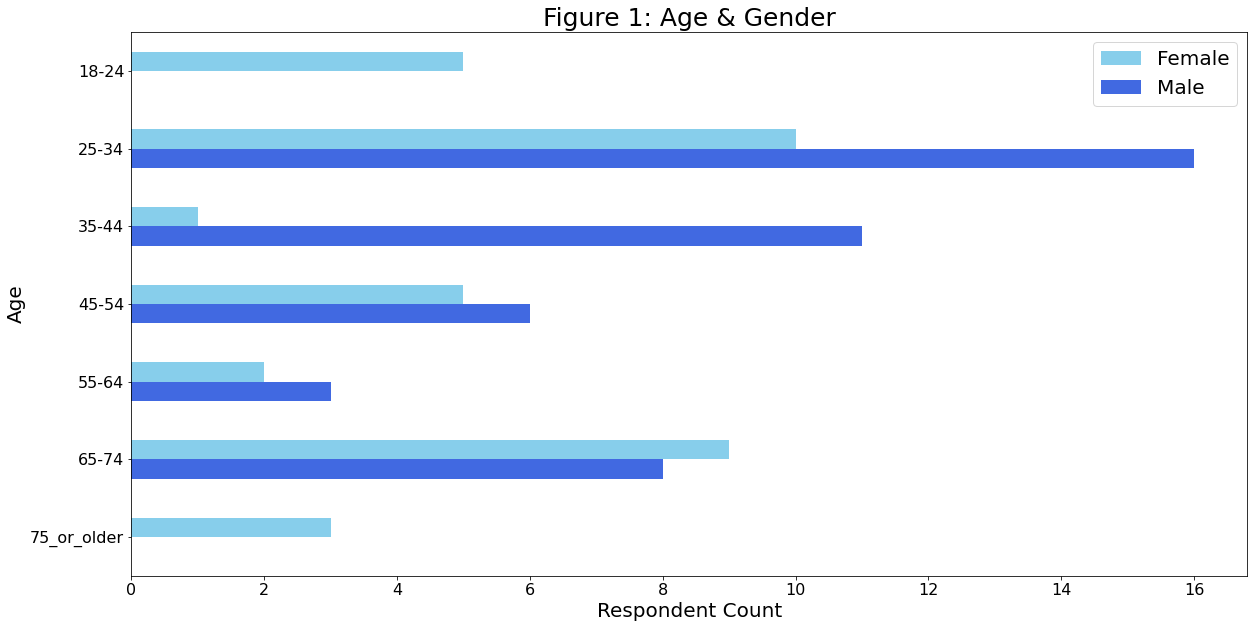

In [23]:
#Figure 1 - Age & Gender 
table = pd.crosstab(df1['age'], df1['gender'])
c = ['skyblue', 'royalblue']
ax = table.plot.barh(figsize = [20, 10], color = c)
ax.set_facecolor('white')
ax.set_title('Figure 1: Age & Gender', fontsize=25)
ax.set_ylabel("Age", fontsize=20)
ax.set_xlabel("Respondent Count", fontsize=20)
ax.invert_yaxis()
plt.tick_params(labelsize=16)
plt.legend(loc='upper right', fontsize=20);

#(Nelson, 2021)
#(matplotlib, 2021)

From the 79 survey respondents, figure 1 uses a multi-variate plot to highlight that all participants within the 18-24 and 75_or_older groups are female. Additionally, it is important to draw attention that the greatest number of respondents are from the 25-34 group.

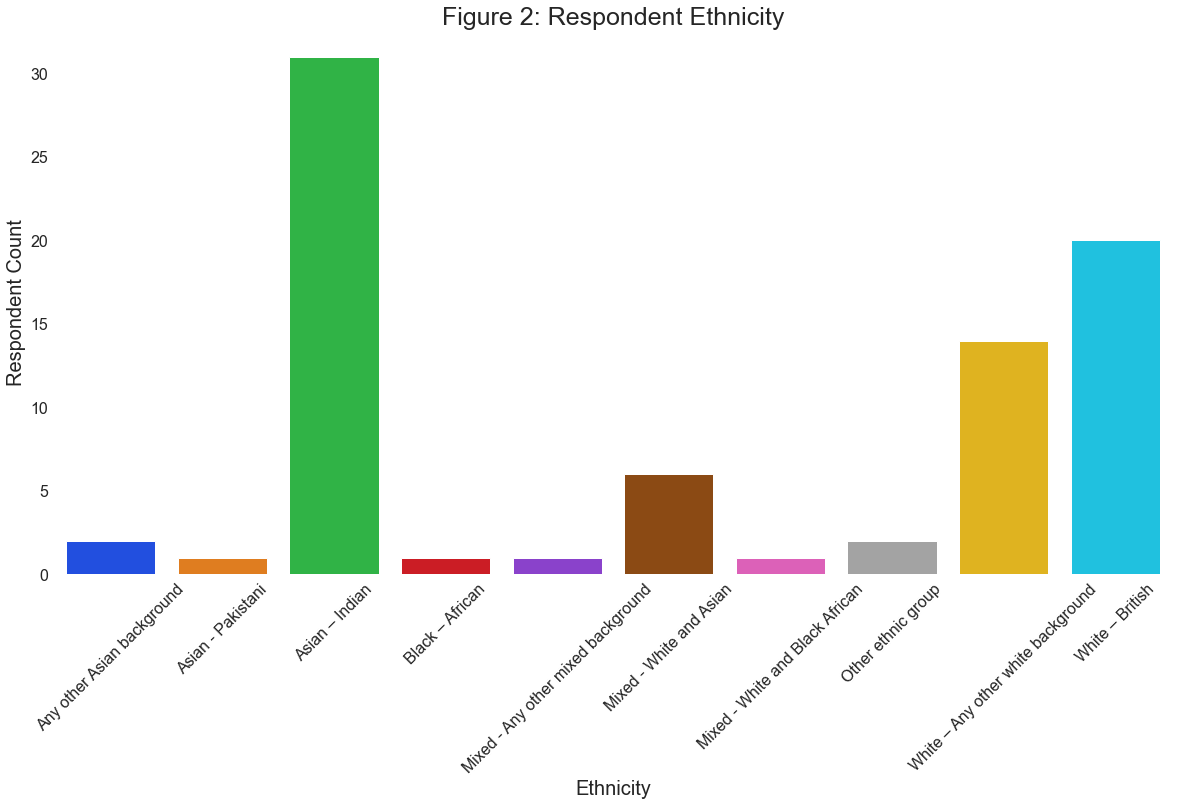

In [24]:
#Figure 2: Respondent Ethnicity
ethnicity_data = df1['ethnicity'].value_counts()

plt.figure(figsize=(20,10))
sns.set_style("dark")
ax = sns.barplot(x = ethnicity_data.index, y = ethnicity_data.values, palette = 'bright')
ax.set_facecolor('white')
ax.set_ylabel("Respondent Count", fontsize=20)
ax.set_xlabel("Ethnicity", fontsize=20)
plt.xticks(rotation=45)
ax.tick_params(labelsize=16)
plt.title('Figure 2: Respondent Ethnicity', fontsize=25);
#(Waskom, n.d.)

Figure 2 uses a simple univariate plot with a qualitative colour palette to show that the greatest number of respondents fall within the ethnicity groups Asian - Indian, White - Any other white background and White - British. All other ethnicities have 6 of fewer respondents.

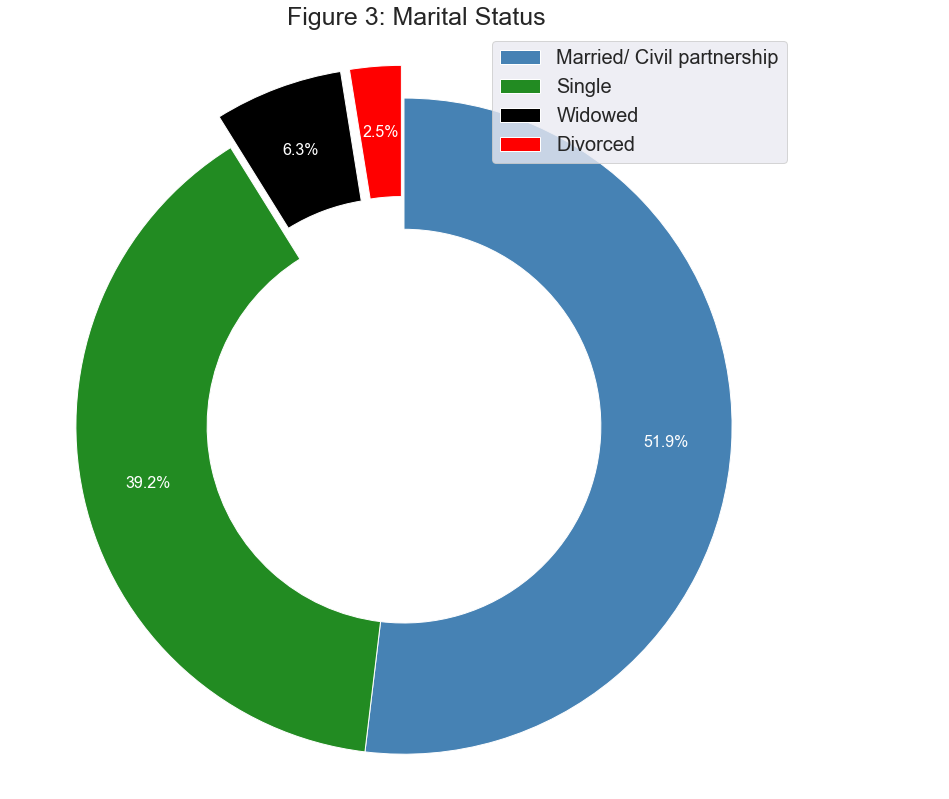

In [25]:
#Figure 3: Marital Status
sorted_counts = df1['marital_status'].value_counts()
color=['steelblue','forestgreen','k', 'red']
explode = (0, 0, 0.1, 0.1)  
labels = df1['marital_status'].value_counts().index

plt.figure(figsize=(14,14))
plt.title('Figure 3: Marital Status', fontsize=25)

plt.pie(sorted_counts, labels = sorted_counts.index, textprops={'fontsize': 16, 'color':"w"}, colors=color, explode=explode, startangle = 90, 
counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%', pctdistance =0.8)
plt.axis('square')

plt.legend(labels, loc='upper right', fontsize=20);

Figure 3 utilises a pie plot to show that over 50% of the respondents are married or in a civil partnership, the other major group of respondents are single (39.2% of respondents).

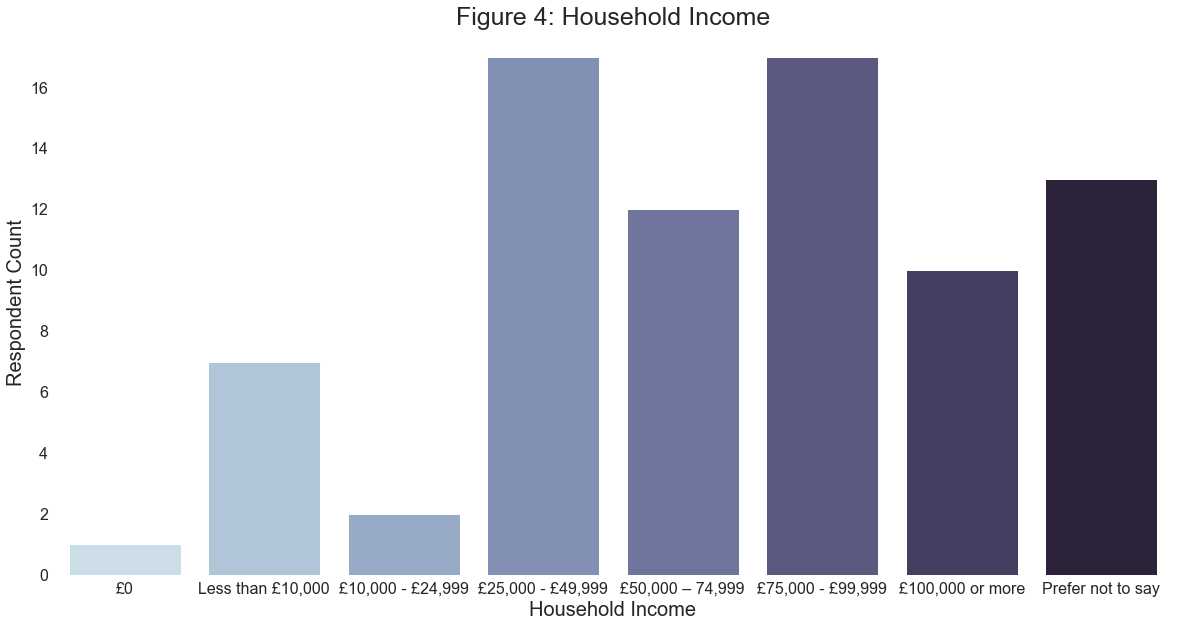

In [26]:
household_income = df1['household_income'].value_counts()

plt.figure(figsize=(20,10))
sns.set_style("dark")
ax = sns.barplot(x = household_income.index, y = household_income.values, color = 'tab:green', palette='ch:s=.25,rot=-.25')
ax.set_facecolor('white')
ax.set_ylabel("Respondent Count", fontsize=20)
ax.set_xlabel("Household Income", fontsize=20)

ax.tick_params(labelsize=16)
plt.title('Figure 4: Household Income', fontsize=25);

Using a sequential colour palette, Figure 4 importantly highlights that the majority of respondents are medium-high income earners. 

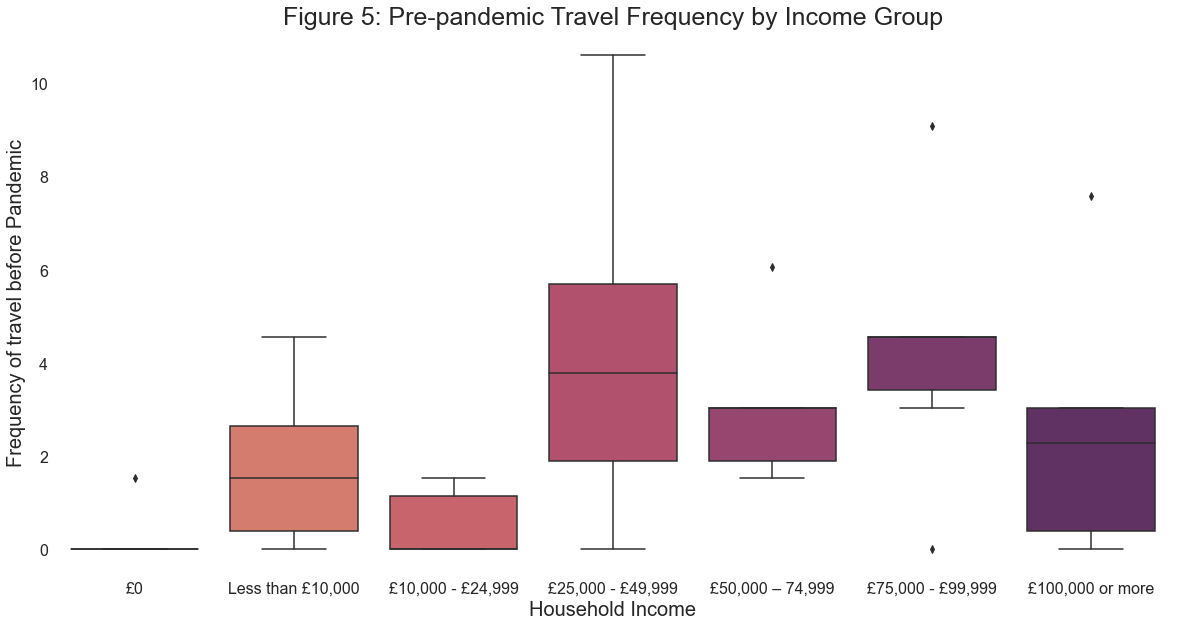

In [27]:
#Figure 5: Pre-pandemic Travel Frequency by Income Group
table_1 = df1.loc[df1['household_income']!= 'Prefer not to say']
table_1 = pd.crosstab(table_1['frequency_of_ travel_before_pandemic'], table_1['household_income'], normalize=True)*100
plt.figure(figsize = [20, 10])
ax = sns.boxplot(data = table_1, palette='flare')
ax.set_facecolor('white')
ax.set_title('Figure 5: Pre-pandemic Travel Frequency by Income Group', fontsize=25)
ax.set_ylabel("Frequency of travel before Pandemic", fontsize=20)
ax.set_xlabel("Household Income", fontsize=20)
plt.tick_params(labelsize=16); 

Figure 5 uses a box plot to highlight the general/ slight trend of increasing incomes and increasing travel frequency. Additionally, there is a very wide dispersion of travel frequency within the £25,000-£49,999 income group. This plot is important to show that the sample are active leisure travellers.

In [28]:
#Creating a function as I will be executing the same plot twice with different data
def willingness_stacked_plot(table, title):
    ax = table.plot.bar(stacked=True, figsize = [20, 10])
    ax.set_facecolor('white')
    ax.set_title(title, fontsize=25)
    ax.set_ylabel("Willingness Response Count", fontsize=20)
    ax.set_xlabel("Age", fontsize=20)
    plt.xticks(rotation=0)
    plt.tick_params(labelsize=16)
    plt.legend(fontsize=20)
    return plt.show();

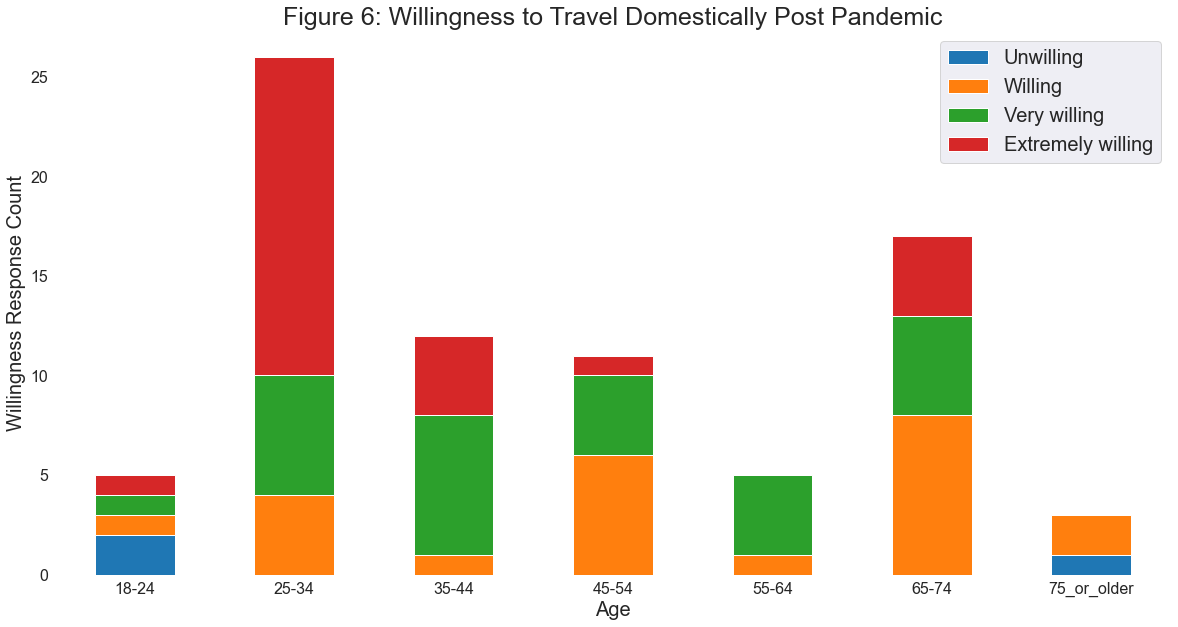

In [29]:
#Figure 6: Willingness to Travel Domestically Post Pandemic
table_1 = pd.crosstab(df1['age'], df1['willingness_to_travel_domestically_post_pandemic'])
willingness_stacked_plot(table_1, 'Figure 6: Willingness to Travel Domestically Post Pandemic')

Figure 6 directly addresses the first two research objectives (noted below) by plotting the willingness of different age groups to travel domestically post-pandemic. 

- To understand the public’s willingness to travel domestically and internationally in the light of Covid-19
- To understand the willingness to travel among different demographic groups in the light of Covid-19

Interestingly, no participant has selected Extremely Unwilling to travel domestically as their survey response. Additionally, all groups have shown that they are willing (to different degrees) to travel domestically. Until the age group 25-34, there is a trend of increasing appetite to travel as age decreases.

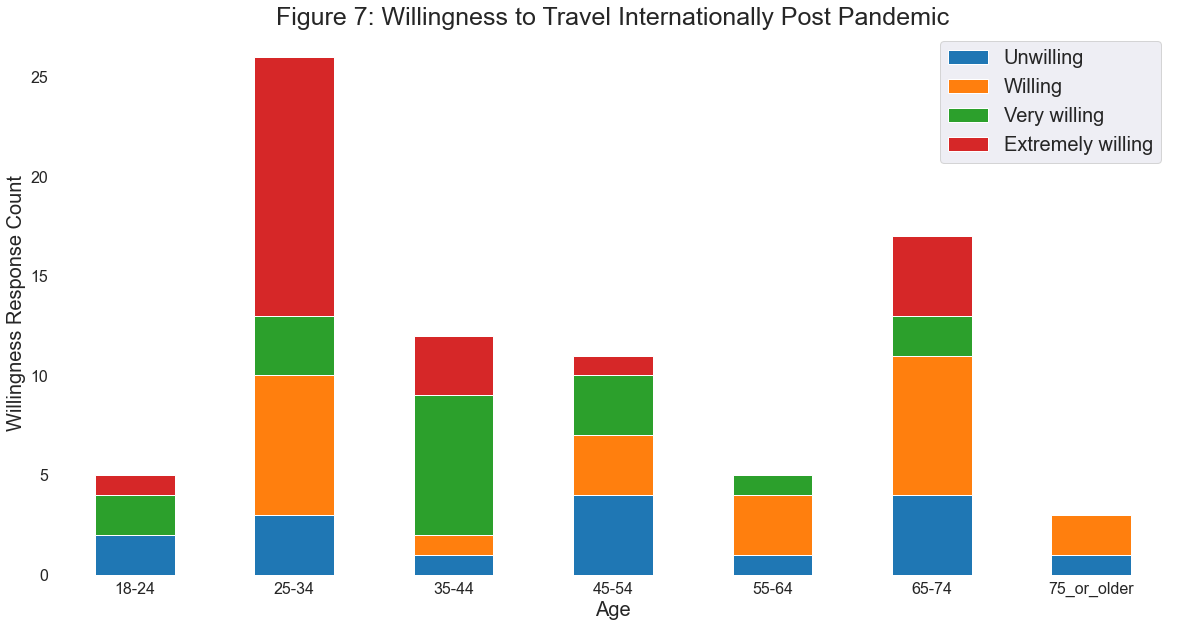

In [30]:
table_2 = pd.crosstab(df1['age'], df1['willingness_to_travel_internationally_post_pandemic'])
willingness_stacked_plot(table_2, 'Figure 7: Willingness to Travel Internationally Post Pandemic')

Along with Figure 6, Figure 7 also helps to address the first two research objectives (noted above). 

Again, there are no participant that have selected Extremely Unwilling as their response. However, there is a significantly larger number of respondents who are unwilling to travel internationally when compared with domestically. That being said, across all age groups there is greater willingness to travel than unwillingness. There is a particularly high openness to travel internationally within younger age groups. 

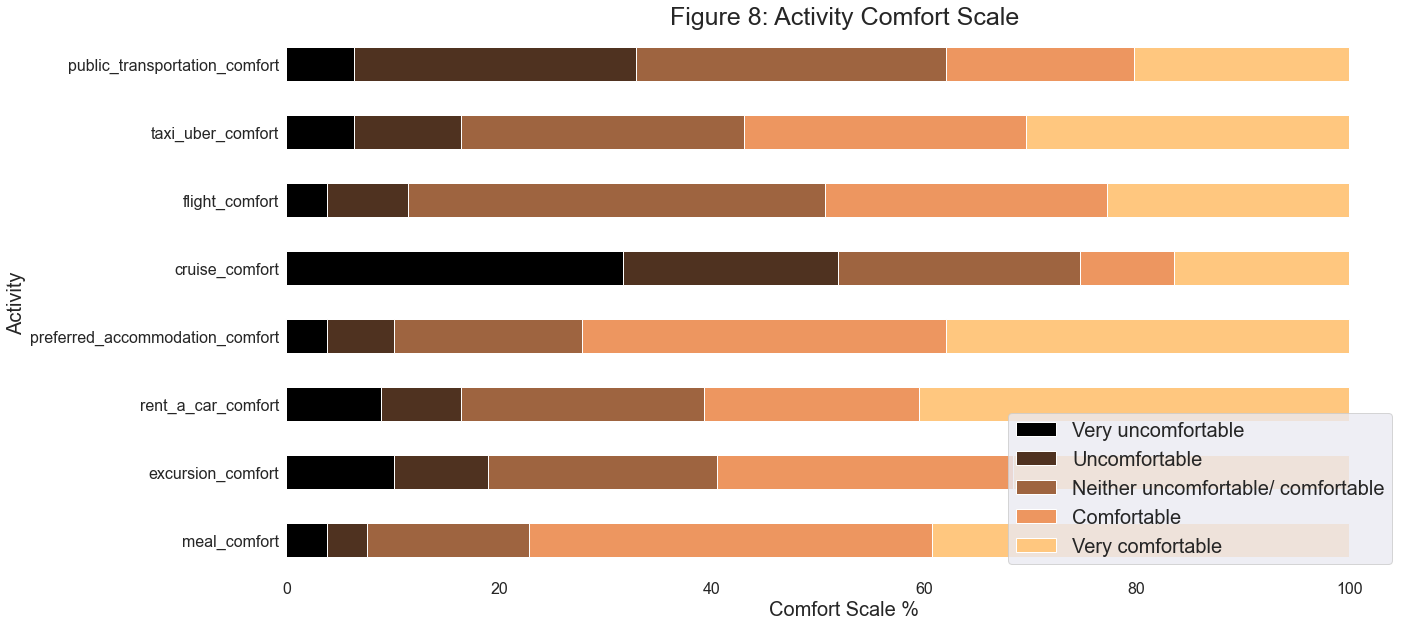

In [31]:
#Figure 8: Activity Comfort Scale
sub=df1[['meal_comfort', 'excursion_comfort', 'rent_a_car_comfort',
       'preferred_accommodation_comfort', 'cruise_comfort', 'flight_comfort',
       'taxi_uber_comfort', 'public_transportation_comfort']].apply(pd.Series.value_counts)/79*100
sub = sub.transpose()
ax = sub.plot(figsize = [20, 10], kind="barh", stacked=True, colormap='copper')
ax.set_facecolor('white')
ax.set_title('Figure 8: Activity Comfort Scale', fontsize=25)
ax.set_ylabel("Activity", fontsize=20)
ax.set_xlabel("Comfort Scale %", fontsize=20)
plt.tick_params(labelsize=16)
legend_labels = ['Very uncomfortable', 'Uncomfortable', 'Neither uncomfortable/ comfortable', 'Comfortable', 'Very comfortable']
plt.legend(fontsize=20, labels = legend_labels);
#(stackoverflow, 2020)

Figure 8 shows a scale (in percentages) of how willing respondents are to complete certain activities. While survey respondents are largely comfortable with going for a meal and staying in their preferred accommodation type, there are large number of respondents who are uncomfortable with taking a cruise, this requires further inspection.

In [32]:
df1[['meal_comfort', 'preferred_accommodation_comfort', 'cruise_comfort', 'flight_comfort']].describe()

,meal_comfort,preferred_accommodation_comfort,cruise_comfort,flight_comfort
count,79.000000,79.000000,79.000000,79.00000
mean,4.050633,3.962025,2.582278,3.56962
std,1.024053,1.079447,1.437658,1.04616
min,1.000000,1.000000,1.000000,1.00000
25%,4.000000,3.000000,1.000000,3.00000
50%,4.000000,4.000000,2.000000,3.00000
75%,5.000000,5.000000,3.500000,4.00000
max,5.000000,5.000000,5.000000,5.00000


The average comfort level of taking a cruise is 2.58 (between uncomfortable and neither uncomfortable/comfortable). This is dramatically lower when compared with taking a flight. Additionally, there is a large standard deviation among the result set, it would therefore be interesting to understand if certain demographics are more adversed to taking a cruise than others.

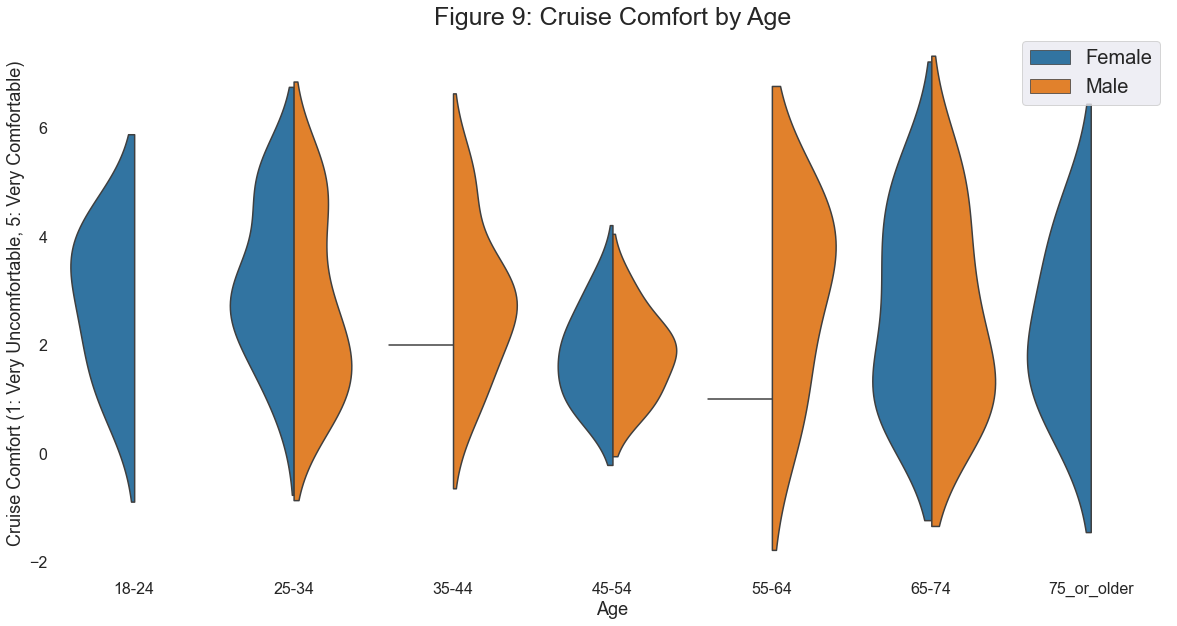

In [33]:
#Figure 9: Cruise Comfort by Age
plt.figure(figsize = [20, 10])
ax = sns.violinplot(data = df1, x = 'age', y = 'cruise_comfort', hue = 'gender', split = True, inner = None)
ax.set_facecolor('white')
ax.set_title('Figure 9: Cruise Comfort by Age', fontsize=25)
ax.set_ylabel("Cruise Comfort (1: Very Uncomfortable, 5: Very Comfortable)", fontsize=18)
ax.set_xlabel("Age", fontsize=18)
plt.tick_params(labelsize=16)
plt.legend(fontsize=20);

#(seaborn, n.d.)

Figure 9 utilises a violin plot to highlight the relationship between cruise comfort, age and gender. For each age group there are two plots, one for males and one for females. The plots show the distribution of responses for cruise comfort. For example, for 18-24's all respondents are female and the cruise comfort bulges around 4 showing that there is a high level of comfort with taking cruises.

Figure 9 shows that the comfort level is very similar for both males and females at each age group. With the exception of 55-64's there is high discomfort in taking a cruise as age increases.

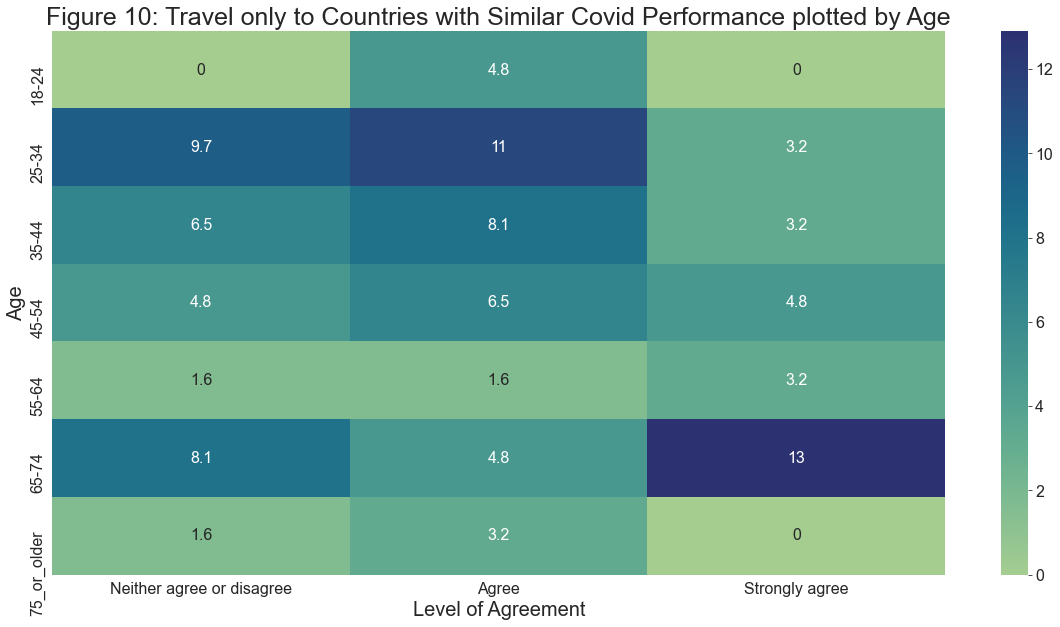

In [34]:
#Figure 10: 
table_1 = pd.crosstab(df1['age'], df1['only_travel_to_countries_with_similar_cases_deaths_vaccinations'], normalize=True)*100
plt.figure(figsize = [20,10])
ax = sns.heatmap(data = table_1, annot=True, cmap='crest', annot_kws={"fontsize":16})
ax.set_title('Figure 10: Travel only to Countries with Similar Covid Performance plotted by Age', fontsize=25)
ax.set_ylabel("Age", fontsize=20)
ax.set_xlabel("Level of Agreement", fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
plt.tick_params(labelsize=16); 
#(stackoverflow, 2016)

Figure 10 plots the level of agreement with the below statement by age group.

- I will only travel to countries which have similar cases, deaths and vaccination rates as my home country.

Heat maps are effectively 2-d versions of histograms, the darker the cell is indicates that there is a higher number of responses. For example 65-74 strongly agree that they will only travel to countries with similar cases, deaths and vaccination rates as their domestic country.

All groups are in some level of agreement with this statement meaning it is a key factor for the public to feel safe with international travel.

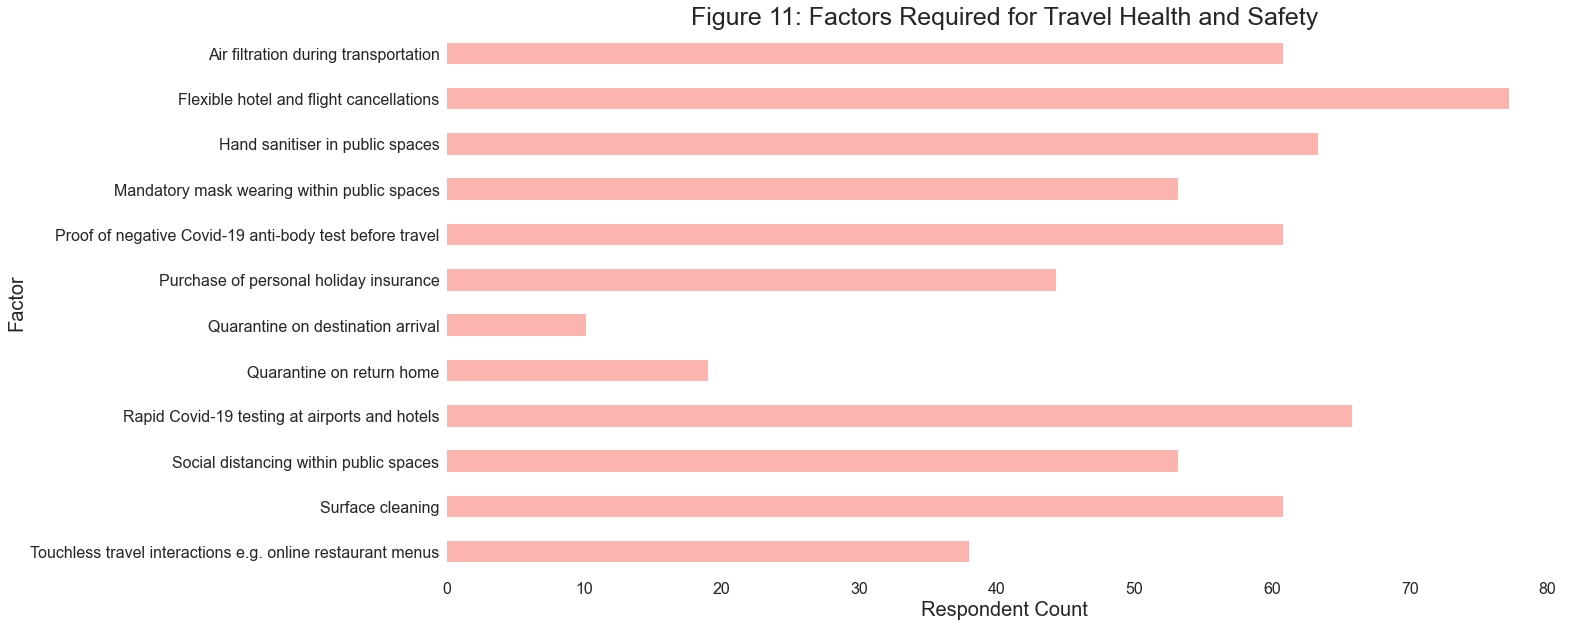

In [37]:
pd.options.mode.chained_assignment = None  # default='warn'
#Figure 11: Factors Required for Travel Health and Safety
sub2 = df1[['required_for_travel_health_and_safety_0',
       'required_for_travel_health_and_safety_1',
       'required_for_travel_health_and_safety_2',
       'required_for_travel_health_and_safety_3',
       'required_for_travel_health_and_safety_4',
       'required_for_travel_health_and_safety_5',
       'required_for_travel_health_and_safety_6',
       'required_for_travel_health_and_safety_7',
       'required_for_travel_health_and_safety_8',
       'required_for_travel_health_and_safety_9',
       'required_for_travel_health_and_safety_10',
       'required_for_travel_health_and_safety_11',
       'required_for_travel_health_and_safety_12']]

sub2['index_1'] = sub2.index

sub2 = sub2.melt(var_name='var', value_name='val', id_vars = 'index_1', value_vars=['required_for_travel_health_and_safety_0',
       'required_for_travel_health_and_safety_1',
       'required_for_travel_health_and_safety_2',
       'required_for_travel_health_and_safety_3',
       'required_for_travel_health_and_safety_4',
       'required_for_travel_health_and_safety_5',
       'required_for_travel_health_and_safety_6',
       'required_for_travel_health_and_safety_7',
       'required_for_travel_health_and_safety_8',
       'required_for_travel_health_and_safety_9',
       'required_for_travel_health_and_safety_10',
       'required_for_travel_health_and_safety_11',
       'required_for_travel_health_and_safety_12'])

sub2 = pd.crosstab(index=sub2['index_1'], columns=sub2['val'])
sub2.drop(columns="", inplace=True)

sub2 = sub2.sum()/sub2.count()*100

ax = sub2.plot(figsize = [20, 10], kind="barh", colormap='Pastel1')
ax.set_facecolor('white')
ax.set_title('Figure 11: Factors Required for Travel Health and Safety', fontsize=25)
ax.set_xlabel('Respondent Count', fontsize=20)
ax.set_ylabel('Factor', fontsize=20)
ax.invert_yaxis()
plt.tick_params(labelsize=16); 

#(JournalDev, n.d.)

Figure 11 highlights the importance for travelers to not have to quarantine on departure/ arrival. Additionally, the plot shows the importance associated with flexible booking platforms.

<a id='conclusion'></a>
## Conclusions
This report set out to meet 3 objectives and to answer the broad question: How has the Covid-19 pandemic impacted the attitudes and behaviours towards leisure travel?

Research Objectives:
- To understand the public’s willingness to travel domestically and internationally in the light of Covid-19
- To understand the willingness to travel among different demographic groups in the light of Covid-19
- To understand what factors are required to be in place for the public to feel safe when travelling

In response to the first two objectives, despite the deadly impact of the Covid-19 pandemic, there is an inclination to travel both domestically and internationally across age groups. This is particularly profound among younger travellers who are extremely willing to travel. The level of comfort travellers feel towards different forms of travel does differ, however. While leisure travellers are comfortable with going for a meal and staying at their desired accommodation venue, they are uncomfortable with taking a cruise or using public transport. This level of discomfort increases with age.

In response to the final objective, leisure travellers stated that it is important that they are travelling to destinations with a similar level of Covid cases, deaths, and vaccination rates as their home. It is also key that travellers have booking flexibility and freedom to cancel flights and accommodation. Finally, travellers stated that they did not want to quarantine on arrival or departure of a destination.

While the Covid-19 pandemic has touched all facets of our lives, younger travellers are not particularly impacted in their attitudes towards travelling. This is not the case for older travellers who are less comfortable with the idea of travelling and this is especially the case for international travel.


<a id='further'></a>
## Further Study
As rules around Covid-19 change and countries increasingly open up to travel, it would be interesting to repeat this study at a later stage to see how sentiment towards travel changes.

A separate area for further study could be to analyse how respondents have used the time they would normally allocate for holidays and whether they intend to continue to use their time in said way once holidays can freely return.

<a id='limit'></a>
## Limitations
A major and obvious limitation of this report is the low level of survey respondents. While 79 responses is significant enough to complete a meaningful analysis, the report would benefit from a wider population surveying. Additionally, a related limitation is the narrow demographics that the survey was able to collect responses from. Unfortunately, the majority of respondents fell within the same demographic groups.

While the report addresses the difference in sentiment towards domestic and international travel, it does not address the difference in opinion towards travel distance or the duration of trips. I suspect that the public will be less inclined to travel long-haul and to take extended trips abroad.

<a id='refer'></a>
## References
JournalDev, n.d. Pandas melt() and unmelt using pivot() function. [Online] 
Available at: https://www.journaldev.com/33398/pandas-melt-unmelt-pivot-function
[Accessed 04 07 2021].

matplotlib, 2021. Choosing Colormaps in Matplotlib. [Online] 
Available at: https://matplotlib.org/stable/tutorials/colors/colormaps.html
[Accessed 04 07 2021].

Nelson, D., 2021. How to Change Plot Background in Matplotlib. [Online] 
Available at: https://stackabuse.com/how-to-change-plot-background-in-matplotlib
[Accessed 04 07 2021].

seaborn, n.d. Plotting with categorical data. [Online] 
Available at: https://seaborn.pydata.org/tutorial/categorical.html
[Accessed 04 07 2021].

stackoverflow, 2016. Seaborn, change font size of the colorbar. [Online] 
Available at: https://stackoverflow.com/questions/37233108/seaborn-change-font-size-of-the-colorbar
[Accessed 04 07 2021].

stackoverflow, 2020. How to make horizontal bar chart using seaborn to be stacked to a 100% by hue parameter?. [Online] 
Available at: https://stackoverflow.com/questions/61740434/how-to-make-horizontal-bar-chart-using-seaborn-to-be-stacked-to-a-100-by-hue-pa
[Accessed 04 07 2021].

Waskom, M., n.d. Seaborn Styling, Part 2: Color. [Online] 
Available at: https://www.codecademy.com/articles/seaborn-design-ii#:~:text=Seaborn%20has%20six%20variations%20of,bright%20%2C%20dark%20%2C%20and%20colorblind%20.
[Accessed 04 07 2021].